In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns

In [2]:
# DOWNLOAD DATA
os.chdir(r'G:\My Drive\שנה ב\שנה ב סמסטר ב\פרויקט דאטא\Analytics-Based Project_\y2019')
Q1_19 = pd.read_csv("Q1_2019.csv",low_memory=False)
Q2_19 = pd.read_csv("Q2_2019.csv",low_memory=False)
Q3_19 = pd.read_csv("Q3_2019.csv",low_memory=False)
Q4_19 = pd.read_csv("Q4_2019.csv",low_memory=False)

In [3]:
# DOWNLOAD DATA
os.chdir(r"G:\My Drive\שנה ב\שנה ב סמסטר ב\פרויקט דאטא\Analytics-Based Project_\y2019")
Q1_18 = pd.read_csv("Q1_2018.csv",low_memory=False)
Q2_18 = pd.read_csv("Q2_2018.csv",low_memory=False)
Q3_18 = pd.read_csv("Q3_2018.csv",low_memory=False)
Q4_18 = pd.read_csv("Q4_2018.csv",low_memory=False)

In [4]:
# create a QURTER column maybe it has some good information
Q1_18["Qrtr"] = 1
Q2_18["Qrtr"] = 2
Q3_18["Qrtr"] = 3
Q4_18["Qrtr"] = 4
Q1_19["Qrtr"] = 1
Q2_19["Qrtr"] = 2
Q3_19["Qrtr"] = 3
Q4_19["Qrtr"] = 4

In [5]:
Q1_18.shape,Q2_18.shape,Q3_18.shape,Q4_18.shape

((133891, 152), (97858, 152), (99124, 152), (103550, 152))

In [6]:
Q1_19.shape,Q2_19.shape,Q3_19.shape,Q4_19.shape

((133891, 151), (97858, 151), (99124, 151), (103550, 151))

In [7]:
# making 2 big Date Frames
all_year_19 = pd.concat([Q1_19,Q2_19,Q3_19,Q4_19])
all_year_18 = pd.concat([Q1_18,Q2_18,Q3_18,Q4_18])

In [8]:
# Get a list of columns in each dataframe
cols_18 = set(all_year_18.columns)
cols_19 = set(all_year_19.columns)

# Find columns that are in one dataframe but not the other
missing_cols = [col for col in cols_18.symmetric_difference(cols_19)]

# Print the missing columns, if any
if missing_cols:
    print("Columns missing in one of the dataframes:")
    for col in missing_cols:
        if col in cols_18:
            print(f"Column '{col}' is missing in 'all_year_19'")
        else:
            print(f"Column '{col}' is missing in 'all_year_18'")
else:
    print("All columns match between the two dataframes.")

Columns missing in one of the dataframes:
Column 'disbursement_method' is missing in 'all_year_19'


In [9]:
# !!! check with ERAN if 'disbursement_method' is not a data leakage to combine it back to the 2019 / use 2018 !!!
all_year_18 =  all_year_18.drop(columns='disbursement_method')

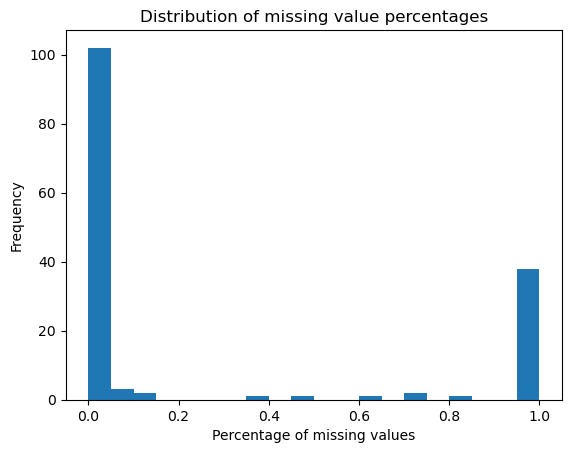

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of missing values in each column
na_percentages = all_year_18.isna().sum() / len(all_year_18)

# Create a histogram of the distribution of missing value percentages
plt.hist(na_percentages, bins=20, range=(0, 1))

# Add labels and a title to the plot
plt.xlabel("Percentage of missing values")
plt.ylabel("Frequency")
plt.title("Distribution of missing value percentages")

# Display the plot
plt.show()


In [11]:
to_drop_feat = all_year_18.columns[na_percentages >= 0.9]
to_test_feat = all_year_18.columns[(na_percentages >= 0.2) & (na_percentages < 0.9)]
to_take_feat = all_year_18.columns[na_percentages < 0.2]

In [12]:
to_test_feat,len(to_drop_feat),len(to_take_feat)

(Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
        'mths_since_last_major_derog', 'mths_since_recent_bc_dlq',
        'mths_since_recent_revol_delinq'],
       dtype='object'),
 38,
 107)

In [13]:
# all colums match the same order
sum(all_year_18.columns == all_year_19.columns)/len(all_year_18.columns)

1.0

In [14]:
# check for matching id to start 
print(sorted(Q1_19.id)[0:5],sorted(Q1_18.id)[0:5])
print(sorted(Q1_19.id)==sorted(Q1_18.id))
print(sorted(Q2_19.id)[0:5],sorted(Q2_18.id)[0:5])
print(sorted(Q2_19.id)==sorted(Q2_18.id))
print(sorted(Q3_19.id)[0:5],sorted(Q3_18.id)[0:5])
print(sorted(Q3_19.id)==sorted(Q3_18.id))
print(sorted(Q4_19.id)[0:5],sorted(Q4_18.id)[0:5])
print(sorted(Q4_19.id)==sorted(Q4_18.id))

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
# seeing matching id meeans we can check now for changed data with time
list(all_year_18.sort_values("id").id) == list(all_year_19.sort_values("id").id) 

In [ ]:
# sorting all years 18 and 19 on "ID" 
all_year_18_sorted = all_year_18.sort_values(by="id").reset_index(drop=True)
all_year_19_sorted = all_year_19.sort_values(by="id").reset_index(drop=True)


In [ ]:
# ok so now we begin to compare the 18 and 19 features reltivly in to check if they change with time
# a N/A in one of the tables (18 & 19) will resualt as a changed value so we want to cancel that
# sum all diffrances
changes_sum = np.sum(all_year_18_sorted != all_year_19_sorted,axis= 0)
# sum all N/A with or condition (because it take only one to resualt as a change)
na_sum = np.sum((all_year_18.isna()) | (all_year_19.isna()),axis=0)
# now we want to inclood only 
unchanged_coloms = all_year_18.columns[changes_sum - na_sum <= 0.05*len(all_year_19)]
len(unchanged_coloms)

In [ ]:
all_year_19.columns[all_year_19.columns.isin(unchanged_coloms) == False]
# all make sence exept -"issue_d". 

In [ ]:
# lets take a look on the intersects of the time-changing and  the "to drop" feature group
print(to_drop_feat.isin(unchanged_coloms))

# ok we drop them from unchangaed because they are more then 90% na's 
unchanged_coloms = unchanged_coloms[unchanged_coloms.isin(to_drop_feat) == False]
print(len(unchanged_coloms),"now we have",len(to_drop_feat),"less features")

In [ ]:
# lets take a look on the intersects of the time-changing and  "to-test" feature group
print(to_test_feat.isin(unchanged_coloms))
# looks like only one feature is changet with time - more concideration need to be done
to_test_feat[to_test_feat.isin(unchanged_coloms)==False]

In [ ]:
# lets take a look on the intersects of the time-changing and  "to-take" feature group
to_take_feat.isin(unchanged_coloms)

In [ ]:
# easy way unchanged colums defined as columns that thier values cahnge less then 5% 
unchanged_coloms2 = all_year_18.columns[ changes_sum  <= len(all_year_18)*0.05 ]

In [ ]:
len(unchanged_coloms2)

In [ ]:
# dropping all colums that has more then 90% missing values.
#all_year_19 = all_year_19.drop(columns=all_year_19.columns[np.sum(all_year_19.isna(),axis= 0) >= len(all_year_19)*0.9])

In [ ]:
all_year_18 = all_year_18[all_year_18.term == " 36 months"]
all_year_19 = all_year_19[all_year_19.term == " 36 months"]

In [ ]:
# lets start with months vector 
all_year_19.payment_lifetime.describe()
# for low values appiring by missing date (start or finish) 
# i assing max time (36 months ) for all negative values:
## it will only hurt (lower) relised return as 
## we asuming those payments are recived as late as possible
### values with 0 get 1 (its best to check in 18 tabbles)
months_vector = list(round(all_year_19.payment_lifetime/30.4))
for i in range(len(months_vector)) : 
    if months_vector[i] < 0 :
        months_vector[i] = 36
    # ! problem with 0 values ! change this ! 
    elif months_vector[i] == 0 : 
        months_vector[i] = 1
    # ! problem with 0 values ! change this ! 
all_year_19["month"] = months_vector

In [ ]:
m = np.array(months_vector) # month from start to finish
t = 36 # only 36 months terms
p = np.array(all_year_19.total_pymnt) # total return
f = np.array(all_year_19.funded_amnt) # total invesment
i = (0.02+1)**(1/12)-1 # i = alternative reinvesment yearly rate 
i 

In [ ]:
realised = (((1/f) * ( ( (p/m)*( (1-(1+i)**m) / (1-(1+i)) ) ) * (1+i)**(t-m) - f ))+1)**(12/t)-1

In [ ]:
# that was monthly - now ajusting for yearly
#all_year_19["rlsd_rtrn"] = (realised+1)**12 -1
all_year_19["rlsd_rtrn"] = realised

In [ ]:
all_year_19.rlsd_rtrn.describe()

In [ ]:

all_year_19["worst_rlsd"] = (((p-f)/f)*(12/t)+1)**12 -1 

In [ ]:
all_year_19["worst_rlsd"].describe()

In [ ]:
# we want to check for 
all_year_19[all_year_19.rlsd_rtrn >= 0.2][["grade","funded_amnt","total_pymnt","month","loan_status","rlsd_rtrn","worst_rlsd"]]

In [ ]:
all_year_19[all_year_19.worst_rlsd <= -0.99][["grade","funded_amnt","total_pymnt","month","loan_status","rlsd_rtrn","worst_rlsd"]]

In [ ]:
# to inspect lets look on all features taken into account in the calculation
colcol = ["grade","funded_amnt","total_pymnt","month","loan_status","rlsd_rtrn","worst_rlsd","issue_d","last_pymnt_d"]

In [ ]:
# lets check this loan - as a loan that needed to have a large negative return 
all_year_19[np.isclose(all_year_19.rlsd_rtrn,-0.32107)][colcol]

In [ ]:
# with ERAN 3rd calc : -0.32107     !#! too high !#!
# with ERAN 1st calc : -0.990523
print("regular irr:",npf.irr([-25525]+[887.11/2]*2))
print("mirr 1:",npf.mirr([-25525]+[887.11/2]*2,finance_rate=(0.02+1)**12-1,reinvest_rate=(0.02+1)**12-1))
print("mirr 2:",npf.mirr([-25525]+[887.11/2]*2,finance_rate=0,reinvest_rate=(0.02+1)**12-1))

print("if we put all investment in stoks & bonds:",(25525*(((0.02+1)**12)-1)**2+1)/25525)

In [ ]:
print(npf.irr([-12000]+[15437.028100]*37))
print(npf.mirr([-12000]+[15437.028100]*37,finance_rate=0,reinvest_rate= (0.02+1)**12-1))
print((12000*(1+0.2)**3-12000)/12000)

In [ ]:
# WTF is going here? its -100%. 
all_year_19[np.isclose(all_year_19.total_pymnt,0)][colcol]

In [ ]:
# lets make a corralation matrix
all_year_19_corr = all_year_19.corr()
all_year_19_corr

In [ ]:
# we want to check feature with correlation to realised return
all_year_19_corr["rlsd_rtrn"][all_year_19_corr["rlsd_rtrn"].abs() < 0.01]

In [ ]:
all_year_19_corr["rlsd_rtrn"][all_year_19_corr["rlsd_rtrn"].abs() > 0.05]

In [ ]:
all_year_19[unchanged_coloms].info()
# we can see there is 31 features that are not numeric - needs to either split them to dummy's or assing numeric values


In [ ]:
# these are all the categoraial featurs that are not 90% na and not changed with time
all_year_19.select_dtypes(include="object").columns[all_year_19.select_dtypes(include="object").columns.isin(unchanged_coloms)]

In [ ]:
# ajust all na to a copy 
test18 = all_year_18_sorted.copy()
test19 = all_year_19_sorted.copy()

In [ ]:
# fill with a fixed uniqe value 
test18 = test18.fillna(value="flopopo")
test19 = test19.fillna(value="flopopo")

In [ ]:
# get all columns that have less then 5% change
unchanged_5_percent = all_year_19_sorted.columns[(test18 != test19).sum()<= len(all_year_19)*0.05]

In [ ]:
final_cols = list(to_take_feat[to_take_feat.isin(unchanged_5_percent)])
final_cols.append(to_test_feat[to_test_feat.isin(unchanged_5_percent)])

In [ ]:
entropies = []
for col in all_year_19.columns:
    freq = all_year_19[col].value_counts()
    prob = freq / len(all_year_19[col])
    entropy = -sum(prob * np.log2(prob))
    entropies.append(entropy)

# Create a DataFrame of variable names and entropies
entropy_19 = pd.DataFrame({'Variable': all_year_19.columns, 'Entropy': entropies})
entropy_19 = entropy_19.sort_values(by='Entropy', ascending=False).reset_index(drop=True)

print(entropy_19)

In [ ]:
np.quantile(entropy_19.Entropy,0.1)

In [ ]:
entropy_19.Variable[(entropy_19.Entropy <= np.quantile(entropy_19.Entropy,0.8)) & (entropy_19.Entropy >= np.quantile(entropy_19.Entropy,0.1)) ]

In [ ]:
all_year_19[all_year_19.loan_status == "Fully Paid"][["int_rate","funded_amnt","total_pymnt","recoveries"]]

In [ ]:
all_year_19_sorted[all_year_19_sorted.recoveries > 0][["total_rec_int","funded_amnt","total_pymnt","recoveries","loan_status","installment"]]

In [ ]:
to_take_feat[to_take_feat.isin(final_cols)][0:25]

In [ ]:
mean_rlsd_rtrn = all_year_19["rlsd_rtrn"].mean()

In [ ]:
all_year_19[all_year_19.addr_state.isna()]["rlsd_rtrn"].mean(),all_year_19.addr_state.isna().sum()

In [ ]:
# before replacing na's we need to see they are not affect mean realised return 
for i in all_year_19.columns : 
    n = all_year_19[i].isna().sum() 
    if n > 0 :
        realised_return = all_year_19[all_year_19[i].isna()]["rlsd_rtrn"].mean()
        if ((realised_return <= mean_rlsd_rtrn -0.005) or (realised_return>= mean_rlsd_rtrn +0.005)) :
             print(i,realised_return,n)

In [ ]:
all_year_19.application_type.value_counts()
print(all_year_19.rlsd_rtrn[all_year_19.application_type != "Joint App"].mean()-all_year_19.rlsd_rtrn.mean())
print(all_year_19.rlsd_rtrn[all_year_19.application_type == "Joint App"].mean()-all_year_19.rlsd_rtrn.mean())
# low entropy and low 

In [ ]:
(all_year_19.acc_now_delinq.value_counts())
print(all_year_19.rlsd_rtrn[all_year_19.acc_now_delinq != 0].mean()-all_year_19.rlsd_rtrn.mean())
print(all_year_19.rlsd_rtrn[all_year_19.acc_now_delinq == 0].mean()-all_year_19.rlsd_rtrn.mean())

In [ ]:
print(all_year_19.rlsd_rtrn[all_year_19.chargeoff_within_12_mths != 0].mean()-all_year_19.rlsd_rtrn.mean())
print(all_year_19.rlsd_rtrn[all_year_19.chargeoff_within_12_mths == 0].mean()-all_year_19.rlsd_rtrn.mean())


In [20]:
sorted(all_year_18.sub_grade.unique()[0:-1])

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [276]:
# column check "open_rv_12m"
all_year_19_sorted["open_rv_12m"].value_counts()

0.0     147137
1.0     130751
2.0      79134
3.0      40360
4.0      19034
5.0       8832
6.0       4322
7.0       2196
8.0       1106
9.0        590
10.0       343
11.0       200
12.0       120
13.0        69
14.0        49
15.0        38
16.0        19
17.0        16
18.0        12
20.0         7
19.0         4
26.0         2
21.0         2
27.0         1
28.0         1
24.0         1
Name: open_rv_12m, dtype: int64

In [278]:
# # column check "open_rv_12m" !! DL !! 
# # Number of revolving trades opened in past 12 months
# n = sum(all_year_19_sorted["open_rv_12m"].isna())
# print("total na's :",n)
# print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["open_rv_12m"].isna() ].mean()-mean_rlsd_rtrn )
# print(all_year_19["rlsd_rtrn"][np.isclose(all_year_19.open_rv_12m,0)].median())
# # with a low count and a low and simmiler mean there will be no affect on disterbution
# fixed_value = 0

total na's : 61
delta of na : -0.005193806478884682
0.046126327445576765


In [274]:
# # column check "open_rv_24m" 
# print("total na's :",sum(all_year_19["open_rv_24m"].isna()))
# print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["open_rv_24m"].isna() ].mean()-mean_rlsd_rtrn )
# # with a low count and a low and simmiler mean there will be no affect on disterbution
# fixed_value = 0 

total na's : 44
delta of na : -0.005193806478884682


In [361]:
# # column check : "max_bal_bc"  !! DL !!

# # description : Maximum current balance owed on all revolving accounts

# ax = sns.displot(all_year_19["max_bal_bc"])
# ax.set(xlim=(all_year_19["max_bal_bc"].min(), 15000))

# print("total na's :",sum(all_year_19["max_bal_bc"].isna()))
# print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["max_bal_bc"].isna() ].mean()-mean_rlsd_rtrn )

# # with a low count and a low and simmiler mean there will be no affect on disterbution 
# fixed_value = 0 # most freqent value
# all_year_19["max_bal_bc"] = all_year_19["max_bal_bc"].fillna(fixed_value)

total na's : 44
delta of na rlsd rtrn : -0.005193806478884682


0         3789.0
2          854.0
3         3381.0
4         3624.0
5         6995.0
           ...  
103486    7659.0
103489    1311.0
103496    3716.0
103503     782.0
103531    5544.0
Name: max_bal_bc, Length: 323495, dtype: float64

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


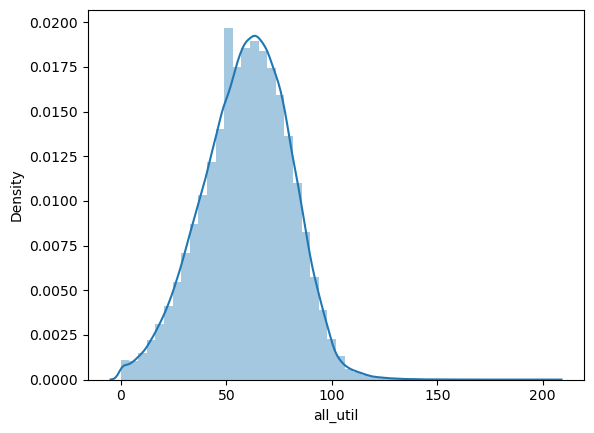

In [299]:
# column check "all_util"
ax = sns.distplot(all_year_19["all_util"])
# looks normal :) 

In [362]:
# column check "all_util"
# Description: Balance to credit limit on all trades

ax = sns.distplot(all_year_19["all_util"])


print("total na's :",sum(all_year_19["all_util"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["all_util"].isna() ].mean()-mean_rlsd_rtrn )

# with a low count and a low and simmiler mean there will be no affect on disterbution
fixed_value = all_year_19["all_util"].mean() #mean of normal disterbution

# filling na
all_year_19["all_util"] =  all_year_19["all_util"].fillna(fixed_value)

total na's : 62
delta of na rlsd rtrn : 0.0011885033364149866


C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    174940
1.0     74592
2.0     36598
3.0     17953
4.0      8783
Name: inq_fi, dtype: int64
total na's : 44
delta of na rlsd rtrn : -0.005193806478884682


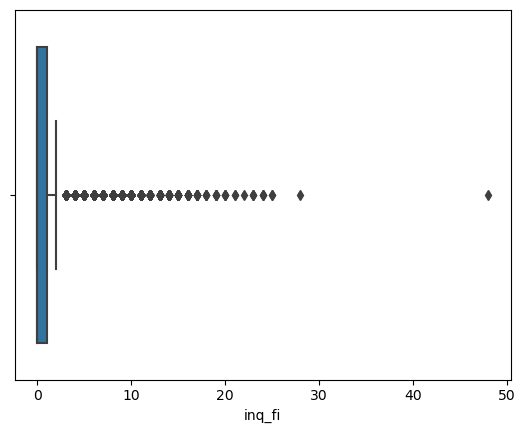

In [365]:
# # column check "inq_fi" 
# # Maximum current balance owed on all revolving accounts

# sns.boxplot(all_year_19["inq_fi"])

# print(all_year_19["inq_fi"].value_counts().head())



# print("total na's :",sum(all_year_19["inq_fi"].isna()))
# print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["inq_fi"].isna() ].mean()-mean_rlsd_rtrn )

# # with a low count and a low and simmiler mean there will be no affect on disterbution
# fixed_value = 0 # most frequent value

# all_year_19["inq_fi"] =  all_year_19["inq_fi"].fillna(fixed_value)

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_cu_tl', ylabel='Density'>

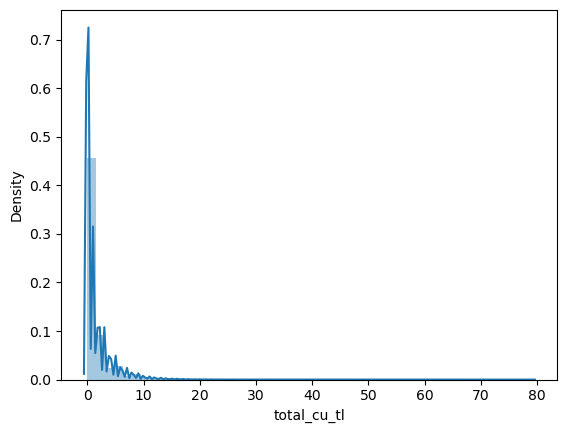

In [366]:
# column check "total_cu_tl"
all_year_19["total_cu_tl"].value_counts().head()
sns.boxplot(all_year_19["total_cu_tl"])
# long right tail

In [325]:
# column check "total_cu_tl"
# Number of finance trades

print(all_year_19["total_cu_tl"].value_counts().head())
sns.boxplot(all_year_19["total_cu_tl"])

print("total na's :",sum(all_year_19["total_cu_tl"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["total_cu_tl"].isna() ].mean()-mean_rlsd_rtrn )

# with a low count and a low and simmiler mean there will be no affect on disterbution

fixed_value = 0 # most frequent value
all_year_19["total_cu_tl"] =  all_year_19["total_cu_tl"].fillna(fixed_value)

total na's : 44
delta of na : -0.005193806478884682


C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inq_last_12m'>

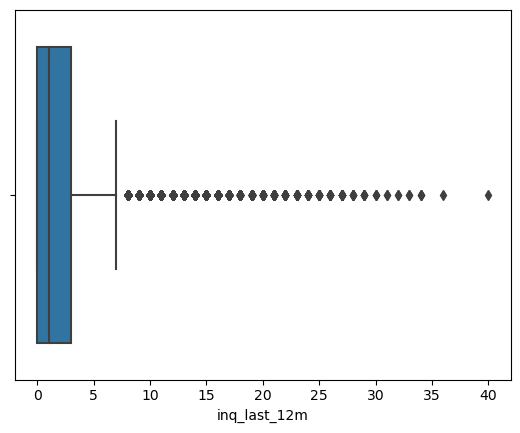

In [336]:
# # column check "inq_last_12m" !! DL !!
# # Number of credit inquiries in past 12 months
# all_year_19["inq_last_12m"].value_counts()

# sns.boxplot(all_year_19["inq_last_12m"])
# # long right tail

In [342]:
# # column check "inq_last_12m" !! DL !! 
# # Number of credit inquiries in past 12 months
# print("total na's :",sum(all_year_19["inq_last_12m"].isna()))
# print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["inq_last_12m"].isna() ].mean()-mean_rlsd_rtrn )
# # with a low count and a low and simmiler mean there will be no affect on disterbution
# fixed_value = 0 # most frequent value

total na's : 44
delta of na : -0.005193806478884682


C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bc_open_to_buy', ylabel='Density'>

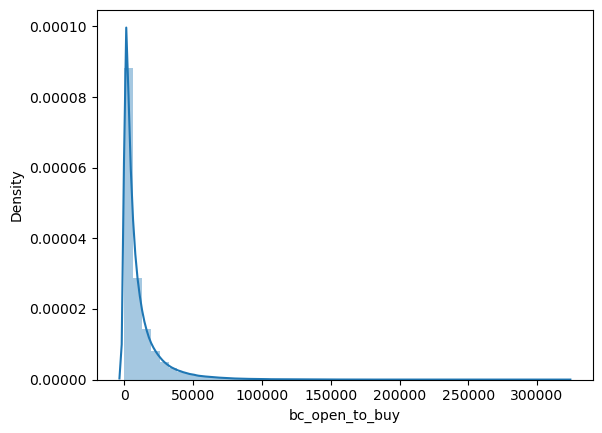

In [346]:
# column check "bc_open_to_buy" 
# Total open to buy on revolving bankcards
all_year_19["bc_open_to_buy"].value_counts()
sns.distplot(all_year_19["bc_open_to_buy"])
# long right tail

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total na's : 3756
delta of na rlsd rtrn : 0.001456027097261222


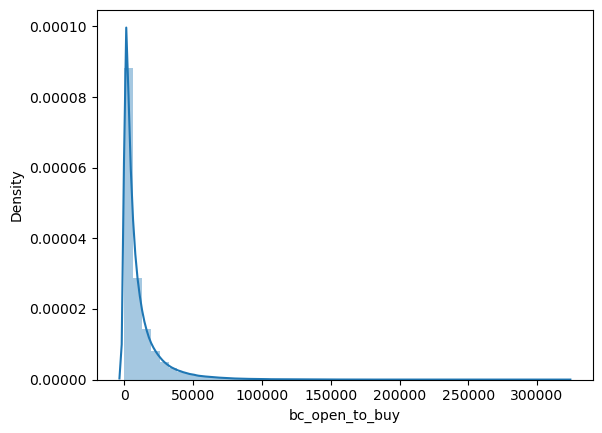

In [367]:
# column check "bc_open_to_buy"
# Total open to buy on revolving bankcards

sns.distplot(all_year_19["bc_open_to_buy"])

print("total na's :",sum(all_year_19["bc_open_to_buy"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["bc_open_to_buy"].isna() ].mean()-mean_rlsd_rtrn )

# with a low diffrande in mean and an understanding an NA represent the abesence of information we can fill with 0

fixed_value = 0 # most frequent value
all_year_19["bc_open_to_buy"] =  all_year_19["bc_open_to_buy"].fillna(fixed_value)

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bc_util', ylabel='Density'>

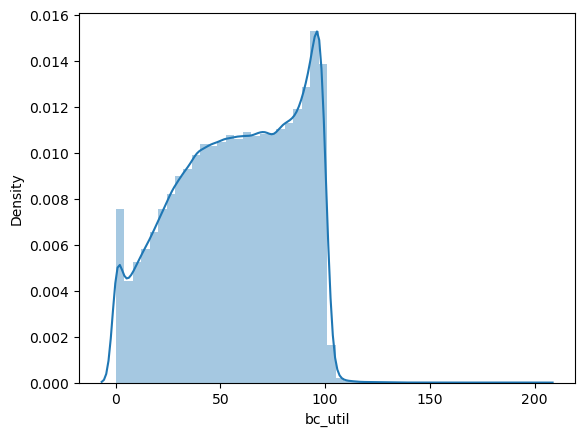

In [350]:
# column check "bc_util" 
# Ratio of total current balance to high credit/credit limit for all bankcard accounts.all_year_19["bc_open_to_buy"].value_counts()
sns.distplot(all_year_19["bc_util"])
# odd distebution

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


total na's : 3913
delta of na rlsd rtrn : 0.0010277113954722424


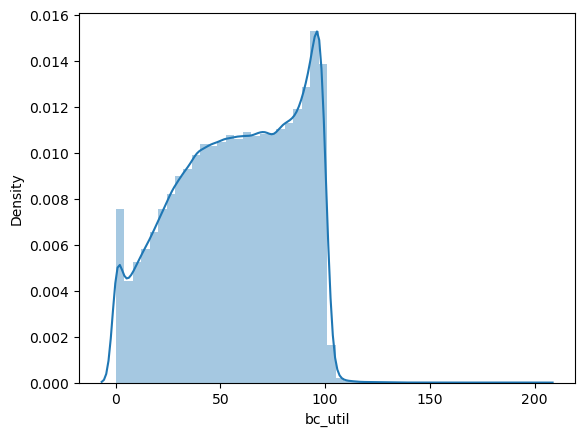

In [368]:
# column check "bc_util" 

# Ratio of total current balance to high credit/credit limit for all bankcard accounts

all_year_19["bc_open_to_buy"].value_counts()

sns.distplot(all_year_19["bc_util"])

print("total na's :",sum(all_year_19["bc_util"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["bc_util"].isna() ].mean()-mean_rlsd_rtrn )

# an na here might oocur from a 0 in the denomintor since its ratio

fixed_value = 0 # most frequent value
all_year_19["bc_util"] =  all_year_19["bc_util"].fillna(fixed_value)

C:\Users\GiladTK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mo_sin_old_il_acct', ylabel='Density'>

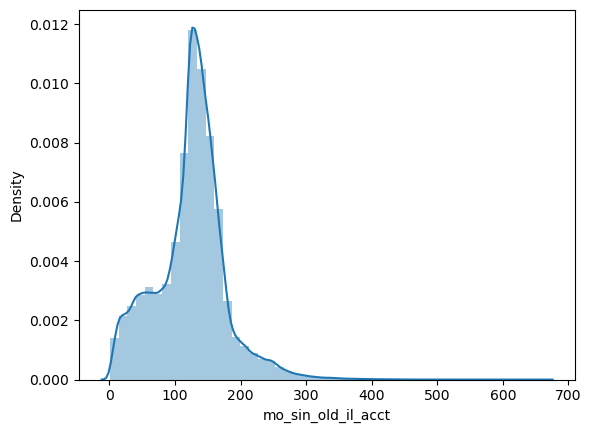

In [353]:
# column check "mo_sin_old_il_acct" !! DL !! 

# Months since oldest bank installment account opened
sns.distplot(all_year_19["mo_sin_old_il_acct"])


In [357]:
# column check "mo_sin_old_il_acct" !! DL !! 
# Months since oldest bank installment account opened

print("total na's :",sum(all_year_19["mo_sin_old_il_acct"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["mo_sin_old_il_acct"].isna() ].mean()-mean_rlsd_rtrn )
# with a low diffrande in mean and an understanding an NA represent the abesence of information we can fill with 0
fixed_value = 0 # most frequent value

total na's : 10081
delta of na rlsd rtrn : 0.0020878304786099734


total na's : 3781
delta of na rlsd rtrn : 0.0015694029041542733


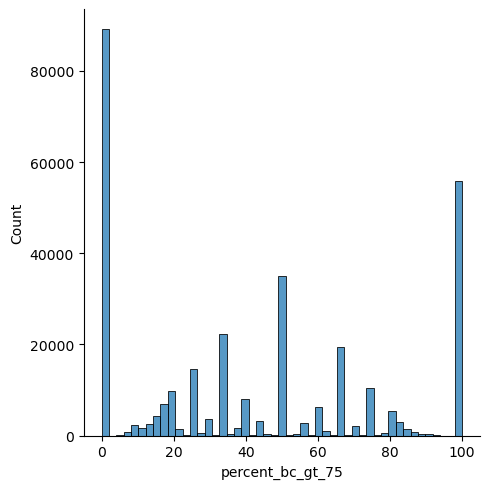

In [360]:
# column check "percent_bc_gt_75"

# Percentage of all bankcard accounts > 75% of limit.sns.distplot(all_year_19["mo_sin_old_il_acct"])

sns.displot(all_year_19["percent_bc_gt_75"])

print("total na's :",sum(all_year_19["percent_bc_gt_75"].isna()))
print("delta of na rlsd rtrn :",all_year_19.rlsd_rtrn[all_year_19["percent_bc_gt_75"].isna() ].mean()-mean_rlsd_rtrn )

# with a low diffrande in mean and an understanding an NA represent the abesence of information we can fill with 0

fixed_value = 0 # most frequent value

all_year_19["percent_bc_gt_75"] =  all_year_19["percent_bc_gt_75"].fillna(fixed_value)

# column check "total_cu_tl"
# Maximum current balance owed on all revolving accounts
print("total na's :",sum(all_year_19["total_cu_tl"].isna()))
print(all_year_19.rlsd_rtrn[all_year_19["total_cu_tl"].isna() ].mean())
print(all_year_19["rlsd_rtrn"][np.isclose(all_year_19["total_cu_tl"],0)].mean())
# with a low count and a low and simmiler mean there will be no affect on disterbution
fixed_value = 0

In [375]:
all_year_19_sorted.id.value_counts().sort_values()

55716       1
352554      1
363009      1
364353      1
364688      1
           ..
96359116    1
96259218    1
96259182    1
96197965    1
96453160    1
Name: id, Length: 434407, dtype: int64

In [384]:
all_year_18[::-1]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,payment_lifetime,Qrtr
103532,89846605,NaN,15000,15000,15000.0,36 months,10.49%,487.47,B,B3,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,212,4
103500,90006838,NaN,5000,5000,5000.0,36 months,21.49%,189.64,D,D5,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,123,4
103498,89078718,NaN,2000,2000,2000.0,36 months,8.99%,63.60,B,B1,...,63.25,N,NaN,NaN,NaN,NaN,NaN,NaN,457,4
103488,89936581,NaN,4500,4500,4500.0,36 months,8.59%,142.25,A,A5,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,151,4
103486,90094364,NaN,4500,4500,4500.0,36 months,14.49%,154.88,C,C4,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,365,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,76042851,NaN,28000,28000,28000.0,36 months,13.67%,952.50,C,C3,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,761,1
3,75124079,NaN,35000,35000,34975.0,36 months,19.53%,1292.36,D,D5,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,184,1
2,75728761,NaN,7500,7500,7500.0,36 months,12.99%,252.67,C,C2,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,214,1
1,75973849,NaN,5900,5900,5900.0,36 months,11.99%,195.94,C,C1,...,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,122,1
